In [1]:
import pickle
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pdb

In [2]:
# Read in the saved camera matrix and distortion coefficients
# These are the arrays you calculated using cv2.calibrateCamera()
dist_pickle = pickle.load( open( "wide_dist_pickle.p", "rb" ) )
mtx = dist_pickle["mtx"]
dist = dist_pickle["dist"]

In [3]:
# Read in an image
img = cv2.imread('test_image2.png')
nx = 8 # the number of inside corners in x
ny = 6 # the number of inside corners in y

In [4]:
type(img)

numpy.ndarray

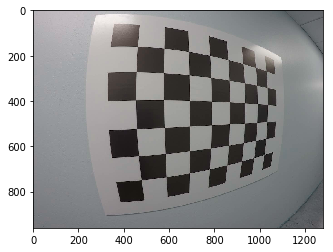

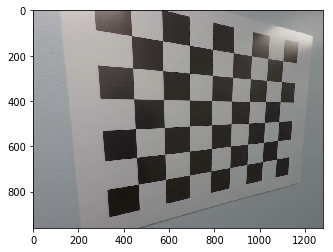

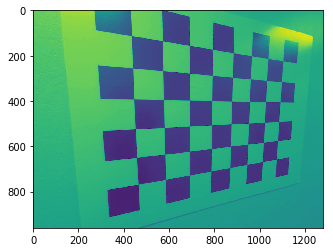

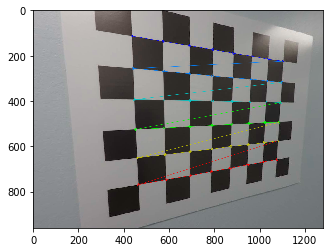

In [5]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
undist = cv2.undistort(img, mtx, dist, None, mtx);
gray = cv2.cvtColor(undist, cv2.COLOR_BGR2GRAY);
plt.imshow(img);
plt.show();
plt.imshow(undist);
plt.show();
plt.imshow(gray);
plt.show();
ret, corners = cv2.findChessboardCorners(gray, (nx,ny), None) ## corner are searched on gray scale images
z=cv2.drawChessboardCorners(undist, (nx, ny), corners, ret) ## where to draw
plt.imshow(z);
plt.show();

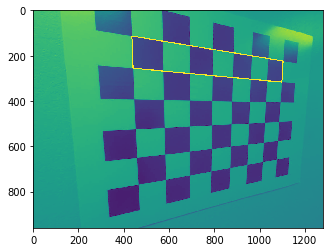

In [6]:
gray_test=gray.copy()
cv2.line(gray_test, tuple(np.squeeze(corners[0])),tuple(np.squeeze(corners[7])), [255,0,0], 3);
cv2.line(gray_test, tuple(np.squeeze(corners[0])),tuple(np.squeeze(corners[8])), [255,0,0], 3);
cv2.line(gray_test, tuple(np.squeeze(corners[8])),tuple(np.squeeze(corners[15])), [255,0,0], 3);
cv2.line(gray_test, tuple(np.squeeze(corners[7])),tuple(np.squeeze(corners[15])), [255,0,0], 3);
plt.imshow(gray_test);
plt.show();

In [7]:
src=np.squeeze([corners[0],corners[7],\
    corners[8],corners[15]])


print(src)

[[  436.50704956   114.33557129]
 [ 1103.99841309   224.66326904]
 [  441.40646362   256.57116699]
 [ 1098.5          317.5       ]]


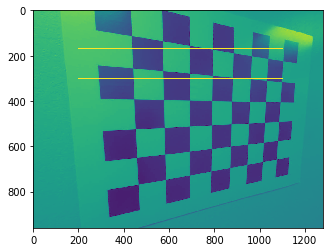

In [8]:
dst_test=gray.copy()
cv2.line(dst_test, (200,170),(1100,170), [255,0,0], 3);
cv2.line(dst_test, (200,300),(1100,300), [255,0,0], 3);
plt.imshow(dst_test);
plt.show();

In [9]:
dst=np.float32([[200,170],[1100,170],[200,300],[1100,300]])
print(dst)

[[  200.   170.]
 [ 1100.   170.]
 [  200.   300.]
 [ 1100.   300.]]


In [10]:
img_size = (gray.shape[1], gray.shape[0])
offset=100
src = np.float32([corners[0], corners[nx-1], corners[-1], corners[-nx]])
dst = np.float32([[offset, offset], [img_size[0]-offset, offset], 
                             [img_size[0]-offset, img_size[1]-offset], 
                             [offset, img_size[1]-offset]])


In [11]:
print(img_size)
print((img.shape[0],img.shape[1]))

(1280, 960)
(960, 1280)


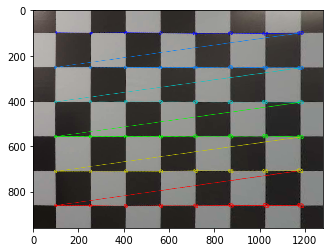

In [12]:
## perspective change
M=cv2.getPerspectiveTransform(src, dst) ## based on manual input. identify t
warped = cv2.warpPerspective(undist, M, img_size)
plt.imshow(warped);
plt.show();


In [13]:
def corners_unwarp(img, nx, ny, mtx, dist):
    #pdb.set_trace()
    # Pass in your image into this function
    # Write code to do the following steps
    undist = cv2.undistort(img, mtx, dist, None, mtx);
    gray = cv2.cvtColor(undist, cv2.COLOR_BGR2GRAY);
    plt.imshow(img);
    plt.show();
    plt.imshow(undist);
    plt.show();
    plt.imshow(gray);
    plt.show();
    ret, corners = cv2.findChessboardCorners(gray, (nx,ny), None) ## corner are searched on gray scale images
    M=None
    warped = np.copy(img)
    if ret == True:
        # a) draw corners
        z=cv2.drawChessboardCorners(undist, (nx, ny), corners, ret) ## where to draw
        plt.imshow(z);
        plt.show();
        img_size = (gray.shape[1], gray.shape[0])
        offset=100
        src = np.float32([corners[0], corners[nx-1], corners[-1], corners[-nx]])
        dst = np.float32([[offset, offset], [img_size[0]-offset, offset], 
                                     [img_size[0]-offset, img_size[1]-offset], 
                                     [offset, img_size[1]-offset]])
        M=cv2.getPerspectiveTransform(src, dst) ## based on manual input. identify t
        print(M)

        warped = cv2.warpPerspective(undist, M, img_size)

    return warped, M

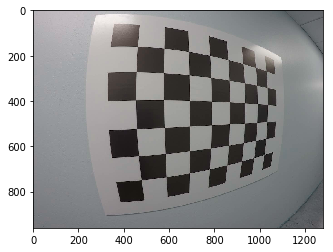

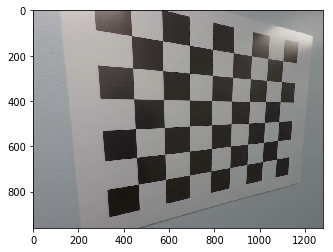

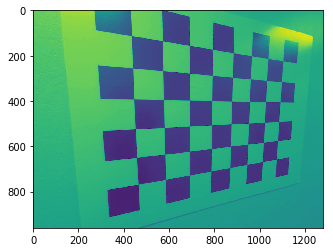

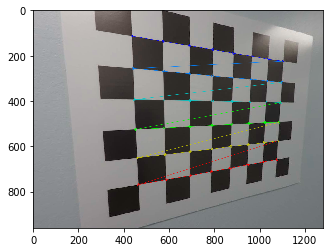

[[  8.16073154e-01  -4.91201890e-02  -2.69651338e+02]
 [ -1.80557638e-01   8.35063399e-01   6.42913926e+01]
 [ -4.06513081e-04  -1.13810309e-04   1.00000000e+00]]


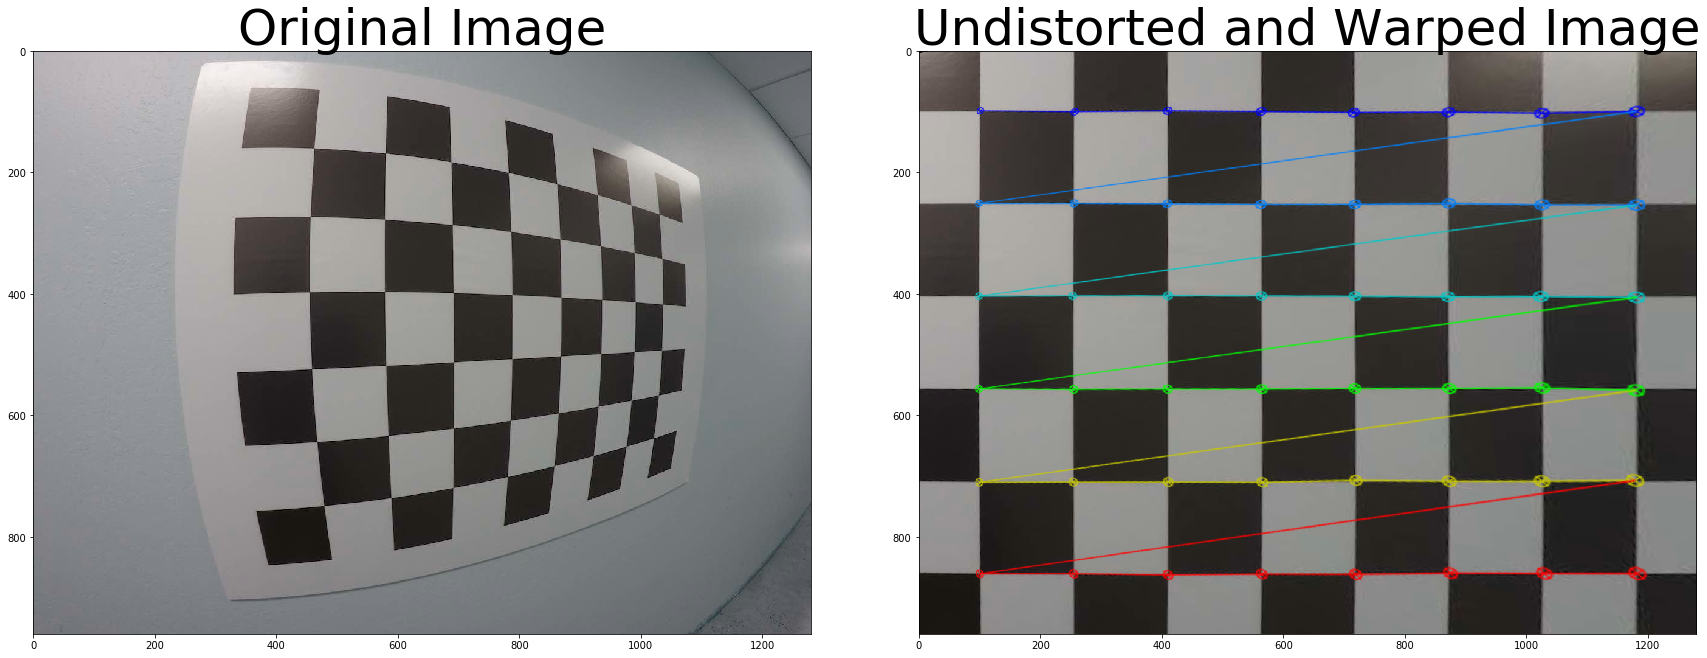

In [14]:
top_down, perspective_M = corners_unwarp(img, nx, ny, mtx, dist)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout();
ax1.imshow(img);
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(top_down);
ax2.set_title('Undistorted and Warped Image', fontsize=50);
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.);